## 42189 Week 7: Exercise 1 (Highway Toll booth problem - DD1 Queue)

$
\lambda(t) = 2.2 + 0.17t − 0.0032t^2 \\
\mu(t) = 1.2 + 0.07t
$

Cumulative arrival and departure functions:

$
A(t) = \int_0^t \lambda(t)dt = \int_0^t (2.2 + 0.17t − 0.0032t^2)dt \\
D(t) = \int_0^t \mu(t)dt = \int_0^t (1.2 + 0.07t)dt
$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as itt

# Discretize time into 65 equally spaced points from t=1 to t=65
t = np.linspace(1,65,65)

# the lambda function (this computes the instantaneous arrival rate at t = 1,2,....65)
lamb = 2.2 + 0.17 * t - 0.0032 * t**2

# the mu function (this computes the instantaneous departure rate at t = 1,2,....65)
mu = 1.2 + 0.07 * t

# Cumulative Arrivals vector 
# The following is a numerical approximation (treating the vehicle arrival rate as contant in each one minute interval)
arriv = list(itt.accumulate(lamb))

# Cumulative Departures vector
depar = list(itt.accumulate(mu))

In [2]:
# Total arrivals after 65 minutes
print(arriv[64])
# A more accurate computation using numerical integration
np.trapz(lamb,t)

207.92199999999994


206.8736

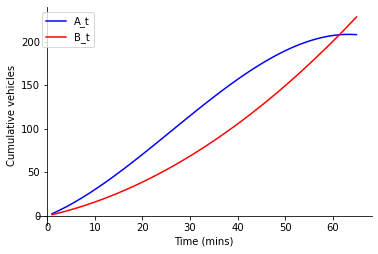

In [3]:
# Plotting
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (mins)')
plt.ylabel('Cumulative vehicles')
# plot the functions
plt.plot(t,arriv,'b',label='A_t')
plt.plot(t,depar,'r',label='B_t')
plt.legend()
# show the plot
plt.show()

Q1. Compute the maximum queue length

In [5]:
# vehicles in queue
queue = (np.array(arriv) - np.array(depar))

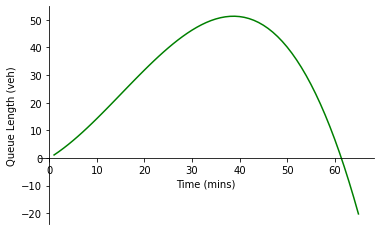

In [6]:
# Plotting the variation of queue length with time
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (mins)')
plt.ylabel('Queue Length (veh)')

plt.plot(t,queue,'g')
plt.show()

In [18]:
np.max(queue)

51.271999999999935

In [19]:
np.argmax(queue)

38

Maximum queue length is roughly 51.27 vehicles and the time of occurence is 39 mins (note: python indexes containers from 0!)

Note: we can see that the queue dissipates at some point after 60, ordinarily we would analytically compute the value of $t^{*}$ at which the queue dissipates, i.e., $A(t)=D(t)$

In [39]:
queue_dissp = np.argwhere(queue<0)[0][0] # Find the first element less than zero
print(queue_dissp)

61


Q2. Compute the total vehicle delay

For this, we need to compute the total area between the departure and arrival curves (or under the queue length curve) before the queue dissipates

In [43]:
veh_delay = np.trapz(queue[:queue_dissp],t[:queue_dissp])
print(veh_delay)

1921.2199999999982


The total vehicle delay is approximately 1921.2 minutes